In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
# https://fred.stlouisfed.org/series/IR10000
# Import Price Index (End Use): Crude Oil
file_path = '/content/import-crude-oil.csv'
crude_oil = pd.read_csv(file_path)
crude_oil = crude_oil.drop(0)

In [3]:
# https://fred.stlouisfed.org/series/CUSR0000SEHE
# Consumer Price Index for All Urban Consumers: Fuel Oil and Other Fuels in U.S. City Average
file_path = '/content/fueloil-and-other-fuel.csv'
fueloil = pd.read_csv(file_path)
fueloil = fueloil.drop(fueloil.index[-1])

In [27]:
# https://fred.stlouisfed.org/series/CUSR0000SAH21
# Consumer Price Index for All Urban Consumers: Household Energy in U.S. City Average
file_path = '/content/household-energy.csv'
household_energy = pd.read_csv(file_path)
household_energy = household_energy.drop(household_energy.index[-1])
household_energy.info()
household_energy.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  120 non-null    object 
 1   CUSR0000SAH21     120 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


,observation_date,CUSR0000SAH21
115,2024-11-01,264.091
116,2024-12-01,266.295
117,2025-01-01,267.553
118,2025-02-01,271.060
119,2025-03-01,274.785


In [49]:
# https://data.bts.gov/Research-and-Statistics/Monthly-Transportation-Statistics/crem-w557/about_data
file_path = '/content/monthly_transportation_statistics.csv'
transport_stats = pd.read_csv(file_path)

transport_stats = transport_stats.tail(121)
transport_stats = transport_stats.drop(transport_stats.index[-1])
transport_stats = transport_stats.rename(columns={transport_stats.columns[1]: 'observation_date'})

# Convert the date column to datetime objects
transport_stats['observation_date'] = pd.to_datetime(transport_stats['observation_date'])

# Display info and head to verify the changes
print("\nModified Dataset Information:")
transport_stats.info()

print("\nFirst 5 rows of the modified dataset:")
display(transport_stats.tail())



Modified Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 819 to 938
Columns: 136 entries, Index to Transborder - U.S. - Canada Freight
dtypes: datetime64[ns](1), float64(134), int64(1)
memory usage: 127.6 KB

First 5 rows of the modified dataset:


<ipython-input-49-7a047d70f98d>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transport_stats['observation_date'] = pd.to_datetime(transport_stats['observation_date'])


,Index,observation_date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
934,934,2024-11-01,14.0,NaN,NaN,83050000.0,10910000.0,72140000.0,14597924.0,314582125.0,...,491000.0,77070000.0,13585000.0,9380000.0,3074000.0,67700000.0,NaN,NaN,0.8,NaN
935,935,2024-12-01,11.0,NaN,NaN,83130000.0,11260000.0,71870000.0,14325685.0,298334626.0,...,454000.0,83340000.0,13829000.0,11240000.0,3039000.0,72100000.0,NaN,NaN,NaN,NaN
936,936,2025-01-01,9.0,NaN,NaN,81260000.0,11180000.0,70080000.0,13757063.0,302628294.0,...,492000.0,70730000.0,12668000.0,10360000.0,2829000.0,60380000.0,NaN,NaN,NaN,NaN
937,937,2025-02-01,11.0,NaN,NaN,NaN,NaN,NaN,13187250.0,291841845.0,...,436000.0,NaN,13045000.0,NaN,2954000.0,NaN,NaN,NaN,NaN,NaN
938,938,2025-03-01,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


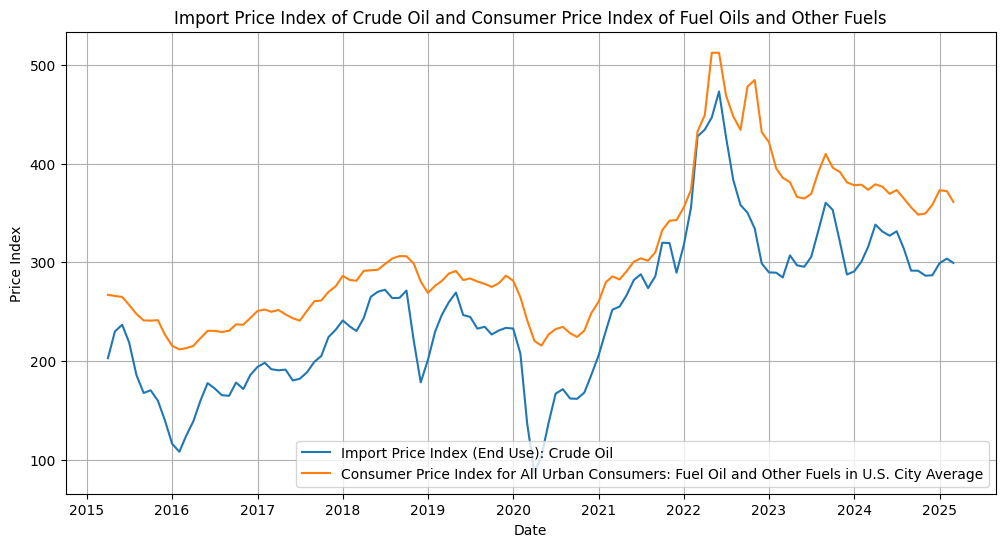

In [5]:
date_column = 'observation_date'

# Convert the date columns to datetime objects
crude_oil[date_column] = pd.to_datetime(crude_oil[date_column])
fueloil[date_column] = pd.to_datetime(fueloil[date_column])

# Plotting the data
plt.figure(figsize=(12, 6))

plt.plot(crude_oil[date_column], crude_oil["IR10000"], label='Import Price Index (End Use): Crude Oil')
plt.plot(fueloil[date_column], fueloil["CUSR0000SEHE"], label='Consumer Price Index for All Urban Consumers: Fuel Oil and Other Fuels in U.S. City Average')

plt.xlabel('Date')
plt.ylabel('Price Index')
plt.title('Import Price Index of Crude Oil and Consumer Price Index of Fuel Oils and Other Fuels')
plt.legend()
plt.grid(True)
plt.show()

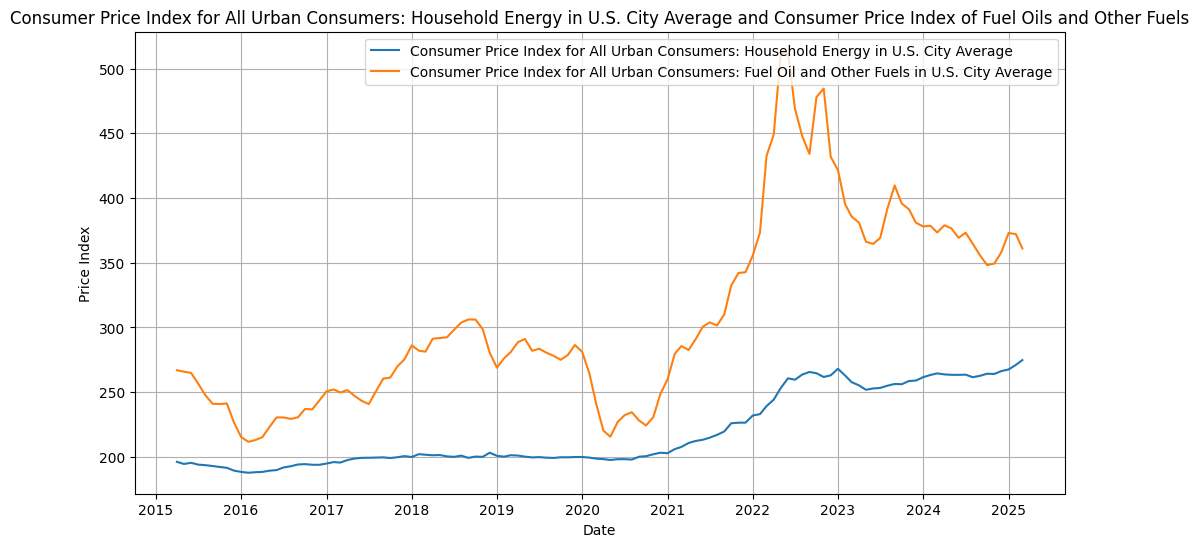

In [6]:
date_column = 'observation_date'

# Convert the date columns to datetime objects
household_energy[date_column] = pd.to_datetime(household_energy[date_column])
fueloil[date_column] = pd.to_datetime(fueloil[date_column])

# Plotting the data
plt.figure(figsize=(12, 6))

plt.plot(household_energy[date_column], household_energy["CUSR0000SAH21"], label='Consumer Price Index for All Urban Consumers: Household Energy in U.S. City Average')
plt.plot(fueloil[date_column], fueloil["CUSR0000SEHE"], label='Consumer Price Index for All Urban Consumers: Fuel Oil and Other Fuels in U.S. City Average')

plt.xlabel('Date')
plt.ylabel('Price Index')
plt.title('Consumer Price Index for All Urban Consumers: Household Energy in U.S. City Average and Consumer Price Index of Fuel Oils and Other Fuels')
plt.legend()
plt.grid(True)
plt.show()

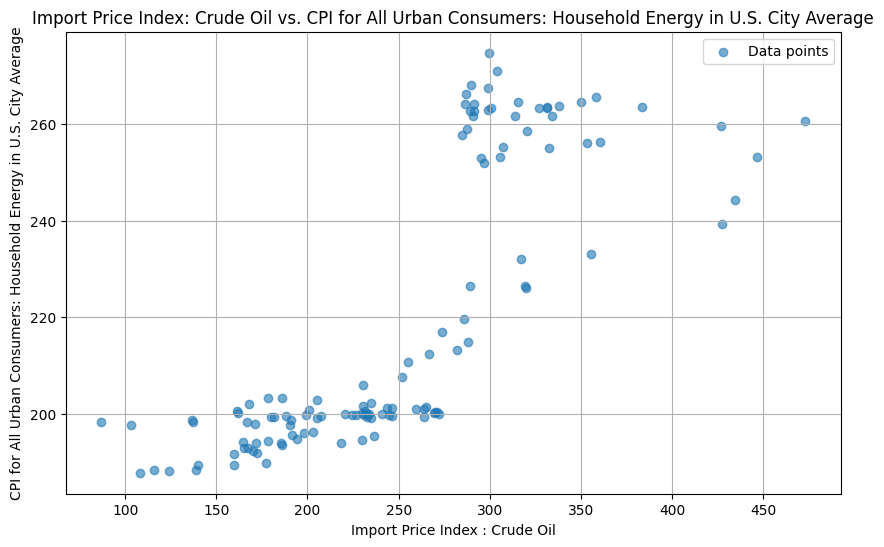

In [17]:
# Merge the two dataframes on the date column
merged_data_oil_energy = pd.merge(crude_oil, household_energy, on=date_column)

# Convert columns to numeric, handling potential non-numeric values
merged_data_oil_energy['IR10000'] = pd.to_numeric(merged_data_oil_energy['IR10000'], errors='coerce')
merged_data_oil_energy['CUSR0000SAH21'] = pd.to_numeric(merged_data_oil_energy['CUSR0000SAH21'], errors='coerce')

# Drop rows with NaN values that resulted from coercion
merged_data_oil_energy.dropna(subset=['IR10000', 'CUSR0000SAH21'], inplace=True)

# Extract data for plotting
oil_prices = merged_data_oil_energy['IR10000']
household_energy_cpi = merged_data_oil_energy['CUSR0000SAH21']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(oil_prices, household_energy_cpi, label='Data points', alpha=0.6)

# # Calculate linear regression
# slope, intercept, r_value, p_value, std_err = linregress(oil_prices, household_energy_cpi)

# # Create the regression line
# regression_line = slope * oil_prices + intercept

# # Plot the regression line
# plt.plot(oil_prices, regression_line, color='red', label=f'Regression Line (R={r_value:.2f})')

plt.xlabel('Import Price Index : Crude Oil')
plt.ylabel('CPI for All Urban Consumers: Household Energy in U.S. City Average')
plt.title('Import Price Index: Crude Oil vs. CPI for All Urban Consumers: Household Energy in U.S. City Average')
plt.legend()
plt.grid(True)
plt.show()

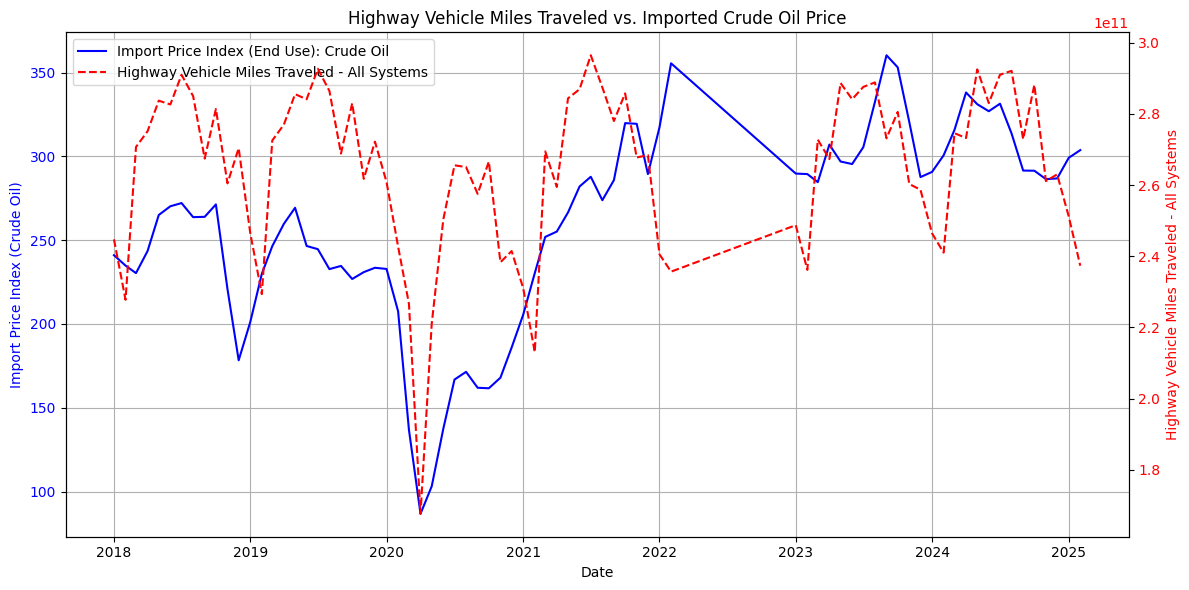

In [48]:
# Select only the desired columns from transport_stats
transport_highway_use = transport_stats[['observation_date', 'Highway Vehicle Miles Traveled - All Systems']]

# Merge with the crude_oil data
merged_highway_oil = pd.merge(transport_highway_use, crude_oil, on='observation_date')

# Convert the 'Highway Vehicle Miles Traveled - All Systems' and 'IR10000' columns to numeric
merged_highway_oil['Highway Vehicle Miles Traveled - All Systems'] = pd.to_numeric(merged_highway_oil['Highway Vehicle Miles Traveled - All Systems'], errors='coerce')
merged_highway_oil['IR10000'] = pd.to_numeric(merged_highway_oil['IR10000'], errors='coerce')

# Drop any rows with NaN values that resulted from coercion
merged_highway_oil.dropna(subset=['Highway Vehicle Miles Traveled - All Systems', 'IR10000'], inplace=True)

# Create the plot with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Crude Oil on the primary y-axis
ax1.plot(merged_highway_oil['observation_date'], merged_highway_oil['IR10000'], label='Import Price Index (End Use): Crude Oil', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Import Price Index (Crude Oil)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a secondary y-axis for Highway Vehicle Use
ax2 = ax1.twinx()
ax2.plot(merged_highway_oil['observation_date'], merged_highway_oil['Highway Vehicle Miles Traveled - All Systems'], label='Highway Vehicle Miles Traveled - All Systems', color='red', linestyle='--')
ax2.set_ylabel('Highway Vehicle Miles Traveled - All Systems', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legend
plt.title('Highway Vehicle Miles Traveled vs. Imported Crude Oil Price')
fig.tight_layout()  # Adjust layout to prevent labels overlapping

# Add legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()